In [3]:
def add_original_feature(df, df_new):
    df_new['open'] = df['Open']
    df_new['open_1'] = df['Open'].shift(1)
    df_new['close_1'] = df['Close'].shift(1)
    df_new['high_1'] = df['High'].shift(1)
    df_new['low_1'] = df['Low'].shift(1)
    df_new['volume_1'] = df['Volume'].shift(1)


In [5]:
def add_avg_price(df, df_new):
    df_new['avg_price_5'] = df['Close'].rolling(5).mean().shift(1)
    df_new['avg_price_30'] = df['Close'].rolling(21).mean().shift(1)
    df_new['avg_price_365'] = df['Close'].rolling(252).mean().shift(1)
    df_new['ratio_avg_price_5_30'] = df_new['avg_price_5'] / df_new['avg_price_30']
    df_new['ratio_avg_price_5_365'] = df_new['avg_price_5'] / df_new['avg_price_365']
    df_new['ratio_avg_price_30_365'] = df_new['avg_price_30'] / df_new['avg_price_365']


In [12]:
def add_avg_volume(df, df_new):
    df_new['avg_volume_5'] = df['Volume'].rolling(5).mean().shift(1)
    df_new['avg_volume_30'] = df['Volume'].rolling(21).mean().shift(1)
    df_new['avg_volume_365'] = df['Volume'].rolling(252).mean().shift(1)
    df_new['ratio_avg_volume_5_30'] = df_new['avg_volume_5'] / df_new['avg_volume_30']
    df_new['ratio_avg_volume_5_365'] = df_new['avg_volume_5'] / df_new['avg_volume_365']
    df_new['ratio_avg_volume_30_365'] = df_new['avg_volume_30'] / df_new['avg_volume_365']

In [7]:
def add_std_price(df, df_new):
    df_new['std_price_5'] = df['Close'].rolling(5).std().shift(1)
    df_new['std_price_30'] = df['Close'].rolling(21).std().shift(1)
    df_new['std_price_365'] = df['Close'].rolling(252).std().shift(1)
    df_new['ratio_std_price_5_30'] = df_new['std_price_5'] / df_new['std_price_30']
    df_new['ratio_std_price_5_365'] = df_new['std_price_5'] / df_new['std_price_365']
    df_new['ratio_std_price_30_365'] = df_new['std_price_30'] / df_new['std_price_365']


In [8]:
def add_std_volume(df, df_new):
    df_new['std_volume_5'] = df['Volume'].rolling(5).std().shift(1)
    df_new['std_volume_30'] = df['Volume'].rolling(21).std().shift(1)
    df_new['std_volume_365'] = df['Volume'].rolling(252).std().shift(1)
    df_new['ratio_std_volume_5_30'] = df_new['std_volume_5'] / df_new['std_volume_30']
    df_new['ratio_std_volume_5_365'] = df_new['std_volume_5'] / df_new['std_volume_365']
    df_new['ratio_std_volume_30_365'] = df_new['std_volume_30'] / df_new['std_volume_365']


In [9]:
def add_return_feature(df, df_new):
    df_new['return_1'] = ((df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)).shift(1)
    df_new['return_5'] = ((df['Close'] - df['Close'].shift(5)) / df['Close'].shift(5)).shift(1)
    df_new['return_30'] = ((df['Close'] - df['Close'].shift(21)) / df['Close'].shift(21)).shift(1)
    df_new['return_365'] = ((df['Close'] - df['Close'].shift(252)) / df['Close'].shift(252)).shift(1)
    df_new['moving_avg_5'] = df_new['return_1'].rolling(5).mean().shift(1)
    df_new['moving_avg_30'] = df_new['return_1'].rolling(21).mean().shift(1)
    df_new['moving_avg_365'] = df_new['return_1'].rolling(252).mean().shift(1)


In [10]:
def generate_features(df):
    df_new = pd.DataFrame()
    add_original_feature(df, df_new)
    add_avg_price(df, df_new)
    add_avg_volume(df, df_new)
    add_std_price(df, df_new)
    add_std_volume(df, df_new)
    add_return_feature(df, df_new)
    df_new['close'] = df['Close']
    df_new = df_new.dropna(axis=0)
    return df_new


In [13]:
import pandas as pd
data_raw = pd.read_csv('19880101_20191231.csv', index_col='Date')
data = generate_features(data_raw)


In [14]:
print(data.round(decimals=3).head(5))


             open   open_1  close_1   high_1    low_1     volume_1  \
Date                                                                 
2018-12-26  21858  22629.0  23139.0  23139.0  22267.0  407940000.0   
2018-12-24  22317  21858.0  22878.0  22879.0  21713.0  433080000.0   
2018-12-21  22872  22317.0  21792.0  22340.0  21792.0  308420000.0   
2018-12-20  23224  22872.0  22445.0  23255.0  22396.0  900510000.0   
2018-12-19  23693  23224.0  22860.0  23282.0  22644.0  576700000.0   

            avg_price_5  avg_price_30  avg_price_365  ratio_avg_price_5_30  \
Date                                                                         
2018-12-26      23112.0     23916.429      26315.571                 0.966   
2018-12-24      23150.4     23837.857      26292.782                 0.971   
2018-12-21      22839.6     23697.619      26266.103                 0.964   
2018-12-20      22663.2     23597.238      26241.869                 0.960   
2018-12-19      22622.8     23515.524    

# Estimating with linear regression

In [15]:
def compute_prediction(X, weights):
    predictions = np.dot(X, weights)
    return predictions


In [16]:
def update_weights_gd(X_train, y_train, weights, learning_rate):
    predictions = compute_prediction(X_train, weights)
    weights_delta = np.dot(X_train.T, y_train - predictions)
    m = y_train.shape[0]
    weights += learning_rate / float(m) * weights_delta
    return weights


In [17]:
def compute_cost(X, y, weights):
    predictions = compute_prediction(X, weights)
    cost = np.mean((predictions - y) ** 2 / 2.0)
    return cost


In [18]:
def train_linear_regression(X_train, y_train, max_iter, learning_rate, fit_intercept=False):
    if fit_intercept:
        intercept = np.ones((X_train.shape[0], 1))
        X_train = np.hstack((intercept, X_train))
    weights = np.zeros(X_train.shape[1])
    for iteration in range(max_iter):
        weights = update_weights_gd(X_train, y_train, weights, learning_rate)
        if iteration % 100 == 0:
            print(compute_cost(X_train, y_train, weights))
    return weights


In [20]:
def predict(X, weights):
    if X.shape[1] == weights.shape[0] - 1:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
    return compute_prediction(X, weights)


In [23]:
import numpy as np
X_train = np.array([[6], [2],[3],[4], [1],[5], [2],[6],[4],[7]])
y_train = np.array([5.5,1.6,2.2,3.7,0.8,5.2,1.5,5.3,4.4,6.8])


In [24]:
weights = train_linear_regression(X_train, y_train, max_iter=100, learning_rate=0.01, fit_intercept=True)


5.571972628


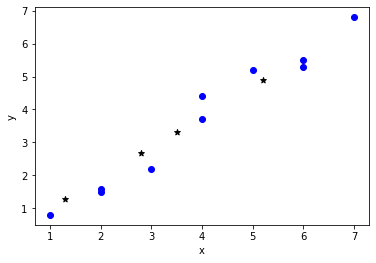

In [25]:
X_test = np.array([[1.3], [3.5], [5.2], [2.8]])
predictions = predict(X_test, weights)
import matplotlib.pyplot as plt
plt.scatter(X_train[:, 0], y_train, marker='o', c='b')
plt.scatter(X_test[:, 0], predictions, marker='*', c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [26]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.data.shape)
num_test = 30
X_train = diabetes.data[:-num_test, :]
y_train = diabetes.target[:-num_test]


(442, 10)


In [27]:
weights = train_linear_regression(X_train, y_train,max_iter=5000, learning_rate=1, fit_intercept=True)
X_test = diabetes.data[-num_test:, :]
y_test = diabetes.target[-num_test:]
predictions = predict(X_test, weights)
print(predictions)
print(y_test)


2960.1229914979613
1984.7462454746596
1729.7738773110927
1627.6313188621893
1572.7594881683713
1539.5508092659084
1518.6139706969352
1505.18745041147
1496.4839556100546
1490.7883504050646
1487.02495657815
1484.5122232041992
1482.8149885868895
1481.653480588507
1480.8466247976992
1480.2764434158958
1479.865546786167
1479.5628140620274
1479.3342299057756
1479.1569872186712
1479.0156704666117
1478.8997716076012
1478.8020640163982
1478.7175316918754
1478.6426597055656
1478.5749609087393
1478.5126580122144
1478.454468440121
1478.399457585006
1478.346937887091
1478.296398827891
1478.2474579352602
1478.1998261818974
1478.153283325459
1478.1076601744603
1478.062825721594
1478.0186777284687
1477.9751357796013
1477.9321361185648
1477.889627781425
1477.8475696822725
1477.8059284029846
1477.764676507645
1477.72379125052
1477.683253581075
1477.6430473744474
1477.603158833949
1477.5635760254202
1477.5242885130954
1477.48528707389
[232.22305668 123.87481969 166.12805033 170.23901231 228.12868839
 154

# Implementing linear regression with scikit-learn


In [28]:
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.0001, learning_rate='constant', eta0=0.01, max_iter=1000)


In [29]:
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
print(predictions)


[218.10786698 128.81796247 191.23486382 173.5260657  208.53234496
 147.99689323 125.90906243  97.5184892  159.12720297 198.41409258
 192.02670003 169.88206724 175.011211    96.63562501 186.97923482
 137.85718375 252.49749205 113.6043566  131.9142913  132.68611261
 213.83601225  86.30535977 142.41970971 127.38540729  67.89625021
 188.65728729 140.22446818 142.59918922 190.10366884  76.13007923]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(


# Implementing linear regression with TensorFlow


In [31]:
import tensorflow as tf
layer0 = tf.keras.layers.Dense(units=1, input_shape=[X_train.shape[1]])
model = tf.keras.Sequential(layer0)


2021-12-10 19:38:42.719531: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-10 19:38:42.720183: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-10 19:38:42.720926: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [32]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(1))


In [33]:
model.fit(X_train, y_train, epochs=100, verbose=True)

2021-12-10 19:39:05.844373: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-12-10 19:39:05.869225: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2899885000 Hz


Epoch 1/100
13/13 [==============================] - 0s 4ms/step - loss: 26282.3474
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 25326.0896
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 19900.4436
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 17657.3917
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 14575.3015
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 13642.6122
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 10612.3838
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 9226.4171
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 9734.0991
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 6646.4424
Epoch 11/100
13/13 [==============================] - 0s 8ms/step - loss: 6145.2970
Epoch 12/100
13/13 [==============================] - 0s 7ms/step - loss: 6417

13/13 [==============================] - 0s 14ms/step - loss: 2868.2804
Epoch 99/100
13/13 [==============================] - 0s 12ms/step - loss: 2678.2198
Epoch 100/100
13/13 [==============================] - 0s 3ms/step - loss: 2844.0761


In [34]:
predictions = model.predict(X_test)[:, 0]
print(predictions)


[231.80783  124.58344  167.00018  171.6597   228.17757  152.43478
 103.23216   92.23092  151.23068  190.50626  191.27783  153.05927
 169.4376   106.67499  167.38737  134.08409  259.771    101.867676
 119.587006 121.46767  219.55157   65.42935  138.69969  123.94461
  56.89624  189.72125  108.98227  129.62686  205.42705   48.567947]


# Estimating with decision tree regression

In [35]:
def mse(targets):
    if targets.size == 0:
        return 0
    return np.var(targets)


In [36]:
def weighted_mse(groups):
    total = sum(len(group) for group in groups)
    weighted_sum = 0.0
    for group in groups:
        weighted_sum += len(group) / float(total) * mse(group)
    return weighted_sum


In [37]:
print(f'{mse(np.array([1, 2, 3])):.4f}')
print(f'{weighted_mse([np.array([1, 2, 3]), np.array([1, 2])]):.4f}')


0.6667
0.5000


In [38]:
def split_node(X, y, index, value):
    x_index = X[:, index]
    if type(X[0, index]) in [int, float]:
        mask = x_index >= value
    else:
        mask = x_index == value
    left = [X[~mask, :], y[~mask]]
    right = [X[mask, :], y[mask]]
    return left, right


In [41]:
def get_best_split(X, y):
    best_index, best_value, best_score, children = None, None, 1e10, None
    for index in range(len(X[0])):
        for value in np.sort(np.unique(X[:, index])):
            groups = split_node(X, y, index, value)
            impurity = weighted_mse([groups[0][1], groups[1][1]])
            if impurity < best_score:
                best_index, best_value, best_score, children = index, value, impurity, groups
    return {'index': best_index, 'value': best_value, 'children': children}


In [42]:
def get_leaf(targets):
    return np.mean(targets)


In [43]:
def split(node, max_depth, min_size, depth):
    left, right = node['children']
    del (node['children'])
    if left[1].size == 0:
        node['right'] = get_leaf(right[1])
        return
    if right[1].size == 0:
        node['left'] = get_leaf(left[1])
        return
    if depth >= max_depth:
        node['left'], node['right'] = get_leaf(
        left[1]), get_leaf(right[1])
        return
    if left[1].size <= min_size:
        node['left'] = get_leaf(left[1])
    else:
        result = get_best_split(left[0], left[1])
        result_left, result_right = result['children']
        if result_left[1].size == 0:
            node['left'] = get_leaf(result_right[1])
        elif result_right[1].size == 0:
            node['left'] = get_leaf(result_left[1])
        else:
            node['left'] = result
            split(node['left'], max_depth, min_size, depth + 1)
    if right[1].size <= min_size:
        node['right'] = get_leaf(right[1])
    else:
        result = get_best_split(right[0], right[1])
        result_left, result_right = result['children']
        if result_left[1].size == 0:
            node['right'] = get_leaf(result_right[1])
        elif result_right[1].size == 0:
            node['right'] = get_leaf(result_left[1])
        else:
            node['right'] = result
            split(node['right'], max_depth, min_size, depth + 1)


In [44]:
def train_tree(X_train, y_train, max_depth, min_size):
    root = get_best_split(X_train, y_train)
    split(root, max_depth, min_size, 1)
    return root


In [45]:
X_train = np.array([['semi', 3], ['detached', 2], ['detached', 3], ['semi', 2], ['semi', 4]], dtype=object)
y_train = np.array([600, 700, 800, 400, 700])
tree = train_tree(X_train, y_train, 2, 2)


In [46]:
CONDITION = {'numerical': {'yes': '>=', 'no': '<'}, 'categorical': {'yes': 'is', 'no': 'is not'}}
def visualize_tree(node, depth=0):
    if isinstance(node, dict):
        if type(node['value']) in [int, float]:
            condition = CONDITION['numerical']
        else:
            condition = CONDITION['categorical']
        print('{}|- X{} {} {}'.format(depth * ' ', node['index'] + 1, condition['no'], node['value']))
        if 'left' in node:
            visualize_tree(node['left'], depth + 1)
        print('{}|- X{} {} {}'.format(depth * ' ', node['index'] + 1, condition['yes'], node['value']))
        if 'right' in node:
            visualize_tree(node['right'], depth + 1)
    else:
        print('{}[{}]'.format(depth * ' ', node))
visualize_tree(tree) 


|- X1 is not detached
 |- X2 < 3
  [400.0]
 |- X2 >= 3
  [650.0]
|- X1 is detached
 [750.0]


In [47]:
boston = datasets.load_boston()
num_test = 10
X_train = boston.data[:-num_test, :]
y_train = boston.target[:-num_test]
X_test = boston.data[-num_test:, :]
y_test = boston.target[-num_test:]
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=10,
min_samples_split=3)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [48]:
print(predictions)


[12.7        20.9        20.9        20.2        20.9        28.4
 20.73076923 24.3        28.4        20.73076923]


In [49]:
print(y_test)


[19.7 18.3 21.2 17.5 16.8 22.4 20.6 23.9 22.  11.9]


# Implementing a regression forest

In [50]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,
max_depth=10, min_samples_split=3)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
print(predictions)


[18.85939784 21.06059248 21.57573543 20.1727114  21.23103428 25.34339227
 21.76796681 27.49857143 26.99674962 21.15003833]


# Implementing SVR

In [51]:
from sklearn.svm import SVR
regressor = SVR(C=0.1, epsilon=0.02, kernel='linear')
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
print(predictions)


[14.59746182 19.31425749 21.16523211 18.52235085 20.19751773 23.75949193
 22.64646343 26.99840893 25.76979558 22.67790167]


# Predicting stock prices with the three regression algorithms


In [65]:
data_raw = pd.read_csv('19880101_20191231.csv', index_col='Date')
data = generate_features(data_raw)
data_train = data.loc['1988-01-01':'2018-12-31']
data_test = data.loc['2019-01-01':'2019-12-31']
X_train = data_train.drop('close', axis=1).values
y_train = data_train['close'].values
X_test = data_test.drop('close', axis=1).values
y_test = data_test['close'].values
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(6547, 37)
(6547,)
(251, 37)
(251,)


In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)


In [68]:
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha": [1e-4, 3e-4, 1e-3],"eta0": [0.01, 0.03, 0.1],}
lr = SGDRegressor(penalty='l2', max_iter=1000, random_state=42)
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='r2')
grid_search.fit(X_scaled_train, y_train)


GridSearchCV(cv=5, estimator=SGDRegressor(random_state=42),
             param_grid={'alpha': [0.0001, 0.0003, 0.001],
                         'eta0': [0.01, 0.03, 0.1]},
             scoring='r2')

In [69]:
print(grid_search.best_params_)
lr_best = grid_search.best_estimator_
predictions_lr = lr_best.predict(X_scaled_test)


{'alpha': 0.0001, 'eta0': 0.01}


In [72]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

print(f'MSE: {mean_squared_error(y_test, predictions_lr):.3f}')
print(f'MAE: {mean_absolute_error(y_test, predictions_lr):.3f}')
print(f'R^2: {r2_score(y_test, predictions_lr):.3f}')


MSE: 43197.110
MAE: 156.974
R^2: 0.962


In [73]:
param_grid = {'max_depth': [30, 50],'min_samples_split': [2, 5, 10],'min_samples_leaf': [3, 5]}
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1,max_features='auto', random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [30, 50], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [74]:
print(grid_search.best_params_)
rf_best = grid_search.best_estimator_
predictions_rf = rf_best.predict(X_test)


{'max_depth': 30, 'min_samples_leaf': 3, 'min_samples_split': 10}


In [75]:
print(f'MSE: {mean_squared_error(y_test, predictions_rf):.3f}')
print(f'MAE: {mean_absolute_error(y_test, predictions_rf):.3f}')
print(f'R^2: {r2_score(y_test, predictions_rf):.3f}')


MSE: 418870.545
MAE: 420.219
R^2: 0.635


In [78]:
param_grid = [{'kernel': ['linear'], 'C': [500],'epsilon': [0.0001]}]


In [79]:
svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2')
grid_search.fit(X_scaled_train, y_train)


GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [500], 'epsilon': [0.0001],
                          'kernel': ['linear']}],
             scoring='r2')

In [80]:
print(grid_search.best_params_)
svr_best = grid_search.best_estimator_
predictions_svr = svr_best.predict(X_scaled_test)
print(f'MSE: {mean_squared_error(y_test, predictions_svr):.3f}')
print(f'MAE: {mean_absolute_error(y_test, predictions_svr):.3f}')
print(f'R^2: {r2_score(y_test, predictions_svr):.3f}')


{'C': 500, 'epsilon': 0.0001, 'kernel': 'linear'}
MSE: 29472.096
MAE: 122.525
R^2: 0.974


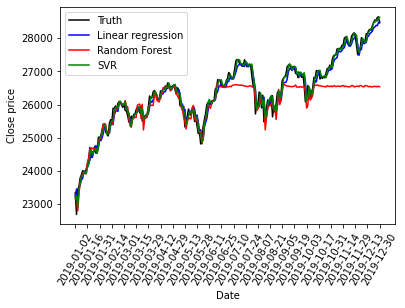

In [81]:
import matplotlib.pyplot as plt
plt.plot(data_test.index, y_test, c='k')
plt.plot(data_test.index, predictions_lr, c='b')
plt.plot(data_test.index, predictions_rf, c='r')
plt.plot(data_test.index, predictions_svr, c='g')
plt.xticks(range(0, 252, 10), rotation=60)
plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend(['Truth', 'Linear regression', 'Random Forest', 'SVR'])
plt.show()
